In [ ]:
# Backprop on the Seeds Dataset
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	predictions = list()
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction)
	return(predictions)

# Test Backprop on Seeds dataset
seed(1)
# load and prepare data
filename = 'seeds_dataset.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 500
n_hidden = 5
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

# Import Important Packages

In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
import os, random

print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.10.0


# Check GPU Available

In [2]:
print("GPU Available: ", tf.config.list_physical_devices("GPU"))
!nvidia-smi -L

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU 0: NVIDIA GeForce RTX 3050 Laptop GPU (UUID: GPU-509cf0ce-8a5d-aa4a-fa20-6093938c3e7e)


# Exploratory Data Analyst

Dataset ini diekspor melalui [universe.roboflow.com](https://universe.roboflow.com/palm-fruit-classification/palm-fruit-ripeness-classificationcnn) pada 23 September 2023 pukul 04.36 GMT

Kumpulan data mencakup 3024 gambar.
Buah sawit dalam format klip.

Pra-pemrosesan berikut diterapkan pada setiap gambar:
* Orientasi otomatis data piksel (dengan stripping orientasi EXIF)
* Ubah ukuran menjadi 299x299 (Peregangan)

In [3]:
train_path = "G:/My Drive/Dataset/Citrus Leaf Disease"
images_path = glob(train_path + "/*/*.jp*g")
classname = os.listdir(train_path)
classname.sort()

## View Image Randomly

Image Shape:  (256, 256, 3)
G:/My Drive/Dataset/Citrus Leaf Disease\Citrus greening\CitrusGreening(3052).JPG


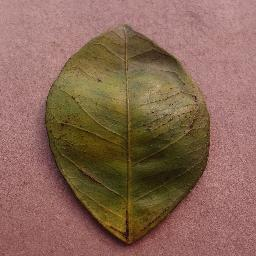

In [4]:
from IPython.display import Image
import matplotlib.image as mpimg

random_img = random.choice(images_path)
print("Image Shape: ", mpimg.imread(random_img).shape)
print(random_img)
Image(random_img)

# Get Dataset From Directory

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255.,
                            validation_split=0.2)

train_data = datagen.flow_from_directory(train_path,
                                        target_size = (224, 224),
                                        subset = "training",
                                        shuffle = True,
                                        class_mode = 'categorical')

val_data = datagen.flow_from_directory(train_path,
                                      target_size = (224, 224),
                                      subset = 'validation',
                                      shuffle = True,
                                      class_mode = 'categorical')

Found 5320 images belonging to 4 classes.
Found 1328 images belonging to 4 classes.


In [26]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(train_path,
                                          image_size=(224, 224),
                                          validation_split=0.2,
                                          subset = "training",
                                          label_mode = "categorical",
                                          seed = 42,
                                          shuffle=True)
val_data = image_dataset_from_directory(train_path,
                                        image_size=(224, 224),
                                        validation_split=0.2,
                                        subset="validation",
                                        label_mode = "categorical",
                                        shuffle=True)

Found 6648 files belonging to 4 classes.
Using 5319 files for training.


ValueError: If using `validation_split` and shuffling the data, you must provide a `seed` argument, to make sure that there is no overlap between the training and validation subset.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
import datetime

logdir = "../logs/citrus/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

early_stopping = EarlyStopping(monitor = "val_accuracy",
                               patience = 3,
                               restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',
                              mode = 'max',
                              factor = 0.2,
                              patience = 2,
                              min_lr=1e-5)

tensorboard = TensorBoard(logdir)

# Creating a MobileNet Architecture Model

In [8]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras import Model
checkpoint_path = "../Checkpoint/citrus/citrus-mobilenetv3small-" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + ".ckpt"

base_model = MobileNetV3Small(minimalistic = True,
                              include_top = False,
                              weights = 'imagenet')
mobilenet_preprocessor = preprocess_input
for layer in base_model.layers:
  layer.trainable = True

input = Input(shape = (224, 224, 3))
prep_input = mobilenet_preprocessor(input)
x = base_model(prep_input)
x = Flatten()(x)
output = Dense(4, activation = "softmax")(x)

model = Model(inputs = input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, None, None, 576)  441000    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 4)                 112900    
                                                                 
Total params: 553,900
Trainable params: 541,788
Non-trainable params: 12,112
_________________________________________________________________


# Compile the Model

In [9]:
model.compile(loss ="categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [10]:
history = model.fit(train_data,
                    validation_data = val_data,
                    epochs = 100,
                    steps_per_epoch = len(train_data),
                    validation_steps = len(val_data),
                    callbacks = [early_stopping, reduce_lr, tensorboard])

model.save_weights(checkpoint_path)

Epoch 1/100
167/167 [==============================] - 838s 5s/step - loss: 0.2926 - accuracy: 0.9156 - val_loss: 0.6599 - val_accuracy: 0.9240 - lr: 0.0010
Epoch 2/100
167/167 [==============================] - 29s 166ms/step - loss: 0.0956 - accuracy: 0.9620 - val_loss: 0.2081 - val_accuracy: 0.9496 - lr: 0.0010
Epoch 3/100
167/167 [==============================] - 28s 163ms/step - loss: 0.0781 - accuracy: 0.9727 - val_loss: 0.4839 - val_accuracy: 0.9338 - lr: 0.0010
Epoch 4/100
167/167 [==============================] - 28s 158ms/step - loss: 0.0359 - accuracy: 0.9880 - val_loss: 0.2945 - val_accuracy: 0.9526 - lr: 0.0010
Epoch 5/100
167/167 [==============================] - 28s 160ms/step - loss: 0.0242 - accuracy: 0.9915 - val_loss: 0.5705 - val_accuracy: 0.8984 - lr: 0.0010
Epoch 6/100
167/167 [==============================] - 29s 164ms/step - loss: 0.0525 - accuracy: 0.9859 - val_loss: 0.2800 - val_accuracy: 0.9518 - lr: 0.0010
Epoch 7/100
167/167 [===========================

In [28]:
model.evaluate(val_data)

42/42 [==============================] - 6s 105ms/step - loss: 0.4123 - accuracy: 0.9090


[0.41231590509414673, 0.9089540839195251]

# View the Training Graph

In [11]:
%load_ext tensorboard
%tensorboard --logdir "G:/My Drive/Colab Notebooks/Checkpoint/palm/" --port=8008

Reusing TensorBoard on port 8008 (pid 19612), started 2 days, 6:37:36 ago. (Use '!kill 19612' to kill it.)

# Load Checkpoint

In [27]:
model.load_weights("C:/Users/salma/pyworkspace/Checkpoint/paddy/paddy-mobilenetv3small-20231015-144214.ckpt")
model.evaluate(val_data)

ValueError: Received incompatible tensor with shape (10,) when attempting to restore variable with shape (4,) and name layer_with_weights-1/bias/.ATTRIBUTES/VARIABLE_VALUE.

# Evaluate

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)
	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')
	else:
		print('Confusion Matrix, Without Normalization')
	print(cm)
	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

In [29]:
y_pred = np.array([])
y_val =  np.array([])
for x, y in val_data:
  y_pred = np.concatenate([y_pred, np.argmax(model.predict(x), axis = -1)])
  y_val = np.concatenate([y_val, np.argmax(y, axis=-1)])

1/1 [==============================] - 0s 24ms/step


## Confusion Matrix

Confusion Matrix, Without Normalization
[[  13    1    9   33]
 [   2    1    3   10]
 [   7    0   29   39]
 [   6    1   10 1165]]


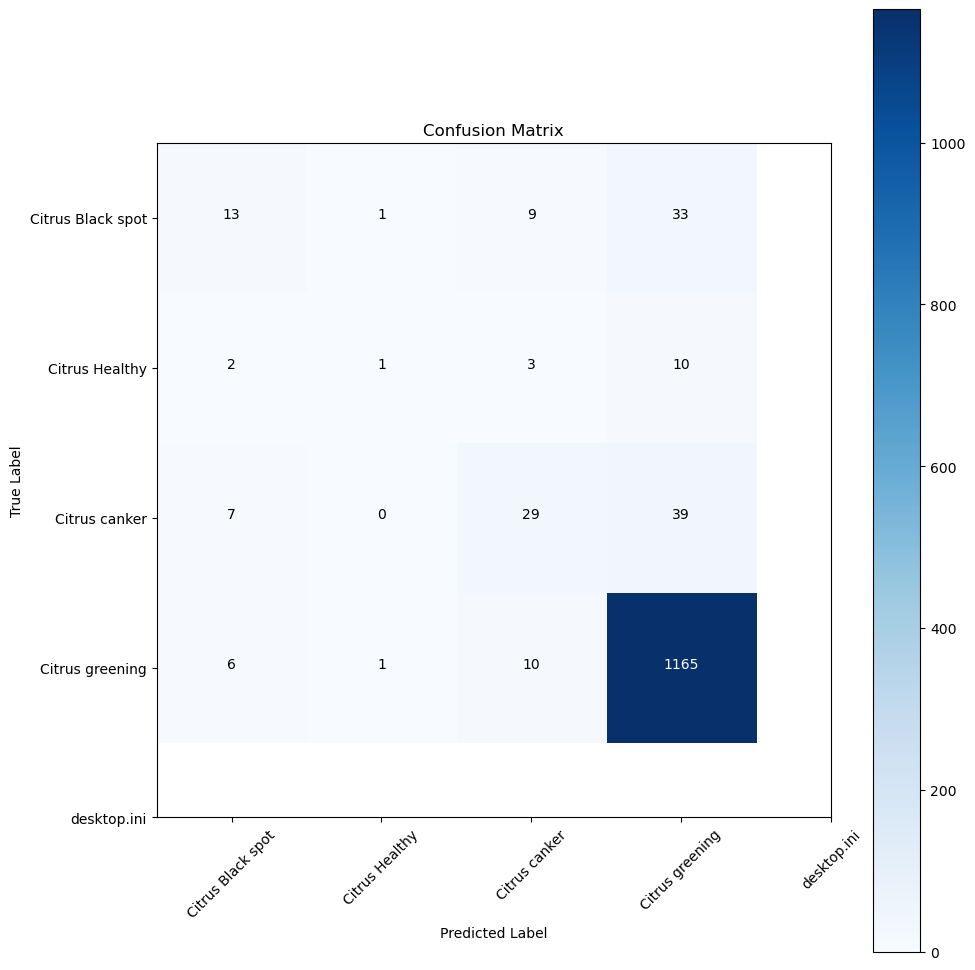

In [30]:
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm = cm, classes = classname)

## Classification Report

In [15]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        56
         1.0       0.83      0.62      0.71        16
         2.0       0.89      0.83      0.86        75
         3.0       0.99      0.99      0.99      1182

    accuracy                           0.98      1329
   macro avg       0.89      0.83      0.86      1329
weighted avg       0.97      0.98      0.97      1329



1/1 [==============================] - 0s 21ms/step


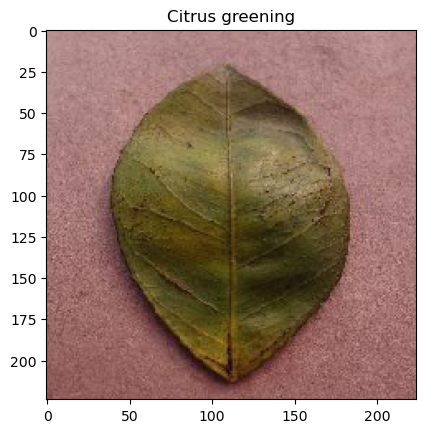

In [21]:
from tensorflow.keras.preprocessing import image

images = image.load_img(random_img, target_size=(224, 224))
x = image.img_to_array(images)
x = np.expand_dims(x, axis = 0)
img = np.vstack([x])
classes = model.predict(img)
implot = plt.imshow(images)
plt.title(classname[np.argmax(classes)]);

In [57]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("../TFlite/padi/padi.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\salma\AppData\Local\Temp\tmp_u2r9d2x\assets


INFO:tensorflow:Assets written to: C:\Users\salma\AppData\Local\Temp\tmp_u2r9d2x\assets


2846364

In [58]:
classname

['Bercak Coklat pada Padi',
 'Blas',
 'Bulai Padi',
 'Gores Daun',
 'Hawar Daun Padi',
 'Hawar Malai Padi',
 'Hispa',
 'Kekeringan',
 'Normal',
 'Tungro']